In [112]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn import preprocessing as per
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

pandas.set_option("display.precision", 2)

input_table = '../../Data/Processed/airbnb/airbnb.parquet'

# Load Data 

In [93]:
data = pandas.read_parquet(input_table)
print('data shape:', data.shape)
print('data columns:', data.columns.tolist())
data.head()

data shape: (5666, 16)
data columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.75,-73.95,Private room,130.0,3.0,248.0,2019-07-01,2.25,1.0,215.0
1,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75,-73.90,Private room,70.0,30.0,25.0,2019-05-31,0.22,1.0,324.0
2,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74,-73.83,Private room,140.0,2.0,1.0,2011-09-19,0.01,1.0,1.0
3,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.75,-73.92,Private room,79.0,30.0,28.0,2019-04-12,0.26,1.0,126.0
4,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70,-73.90,Entire home/apt,350.0,8.0,10.0,2019-05-12,0.11,5.0,365.0


# Data Description 

In [16]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,5.67e+03,5.67e+03,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00,5666.00
mean,2.18e+07,9.62e+07,40.73,-73.87,99.52,5.18,27.70,1.57,4.06,144.45
std,1.04e+07,8.42e+07,0.04,0.06,167.10,15.03,51.96,2.13,12.45,135.54
min,1.29e+04,3.21e+03,40.57,-73.96,10.00,1.00,0.00,0.00,1.00,0.00
25%,1.40e+07,2.12e+07,40.71,-73.92,50.00,1.00,1.00,0.08,1.00,2.00
50%,2.26e+07,6.83e+07,40.74,-73.90,75.00,2.00,7.00,0.76,1.00,98.00
75%,3.08e+07,1.58e+08,40.76,-73.83,110.00,3.00,32.00,2.31,3.00,286.00
max,3.65e+07,2.74e+08,40.80,-73.71,10000.00,500.00,629.00,20.94,103.00,365.00


# Variable Distribution

In [65]:
num_variables = ['latitude', 'longitude', 'price','minimum_nights','number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']

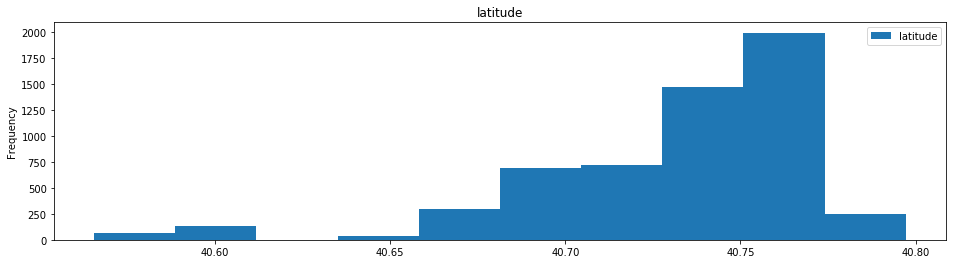

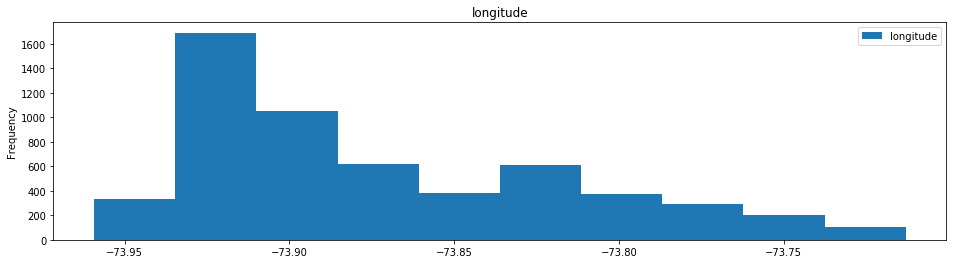

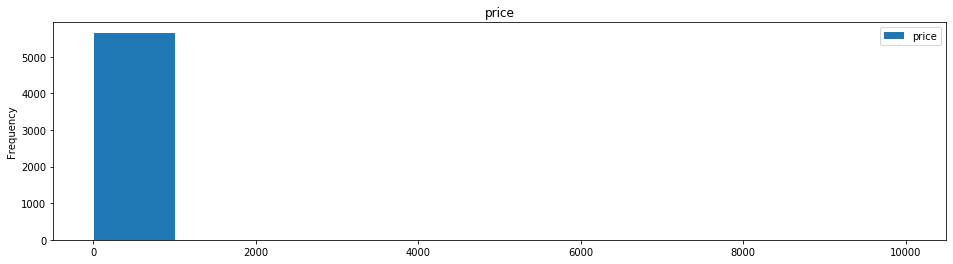

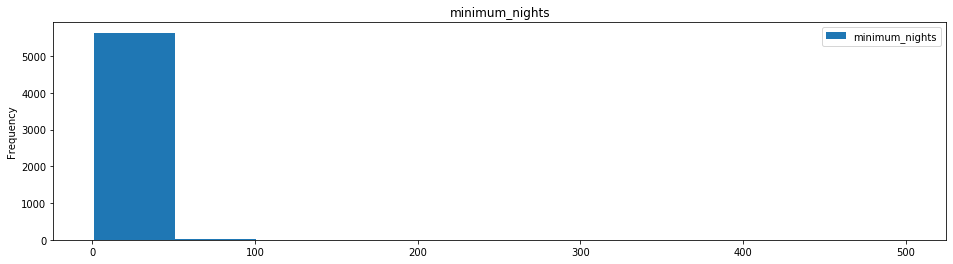

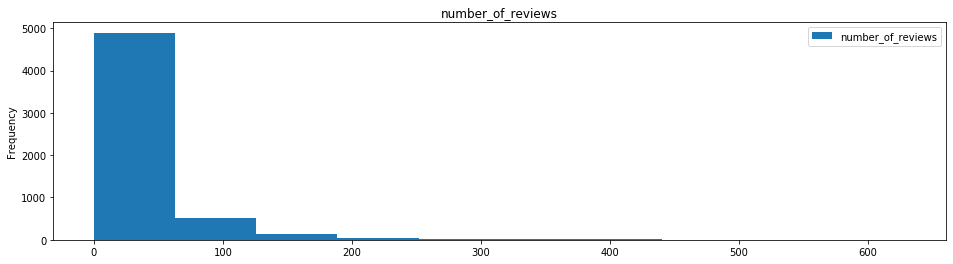

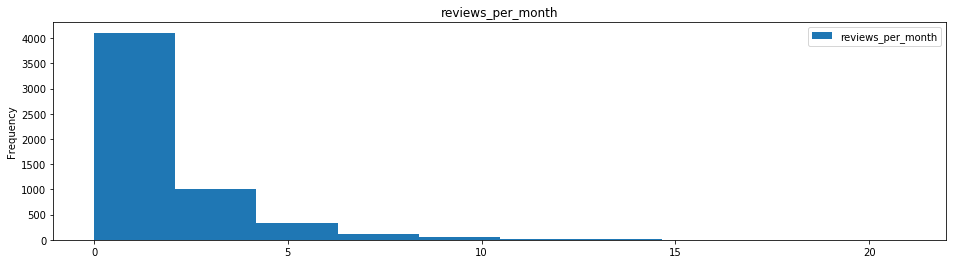

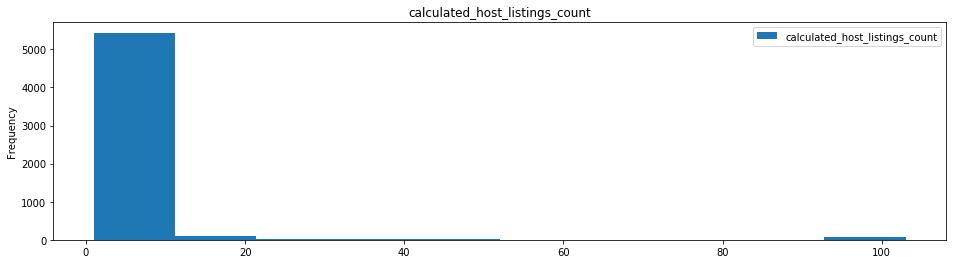

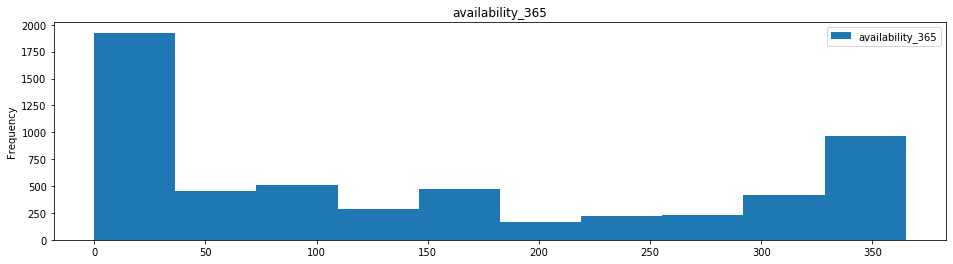

In [66]:
for cname in num_variables:
    plt.figure()
    data[cname].plot.hist(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

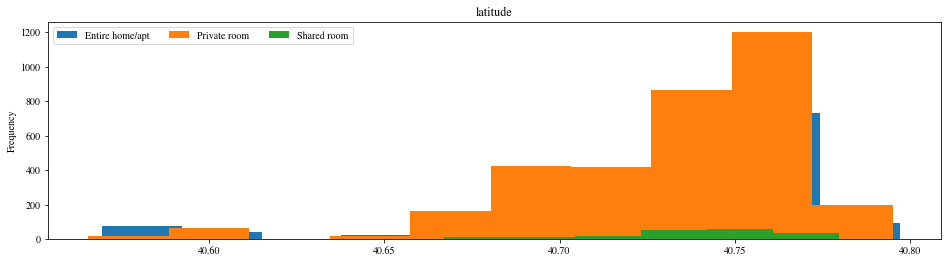

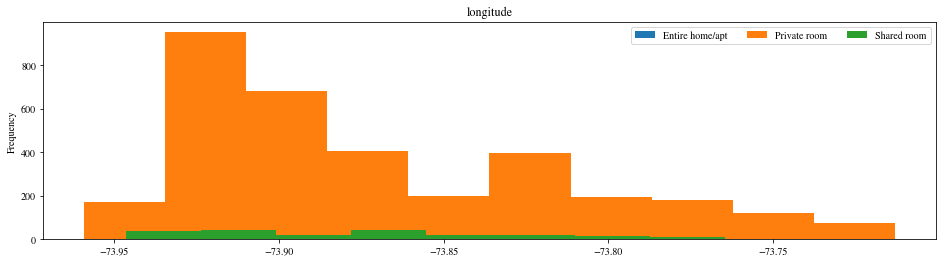

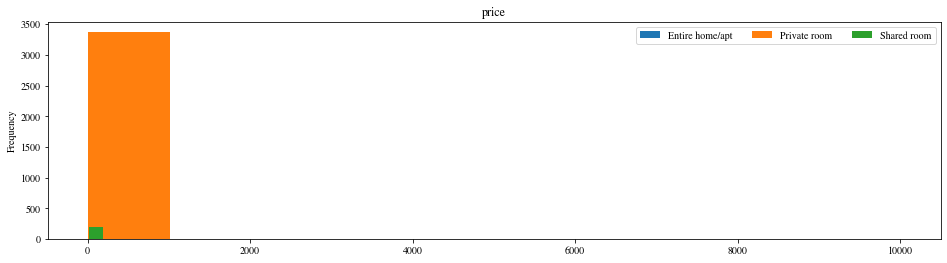

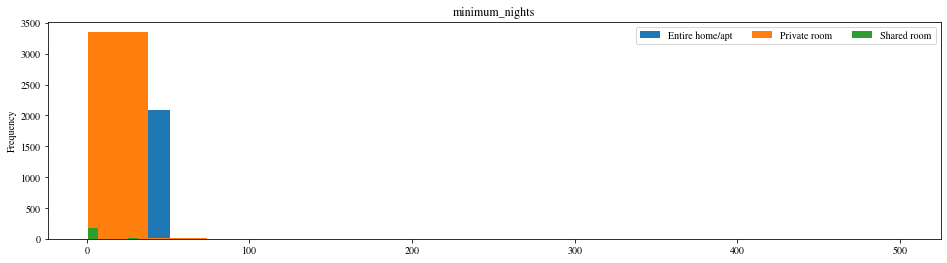

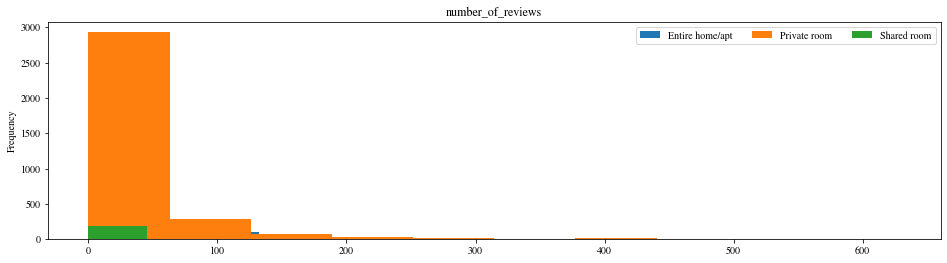

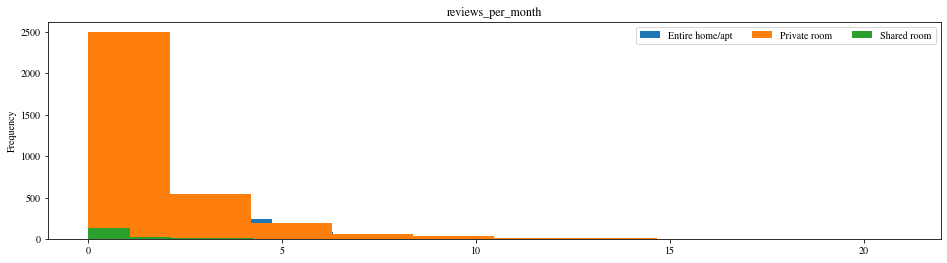

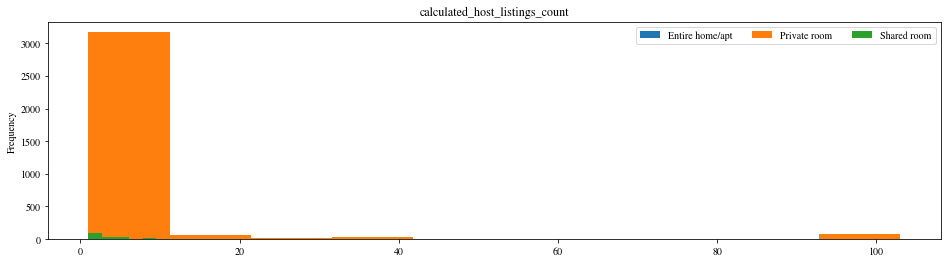

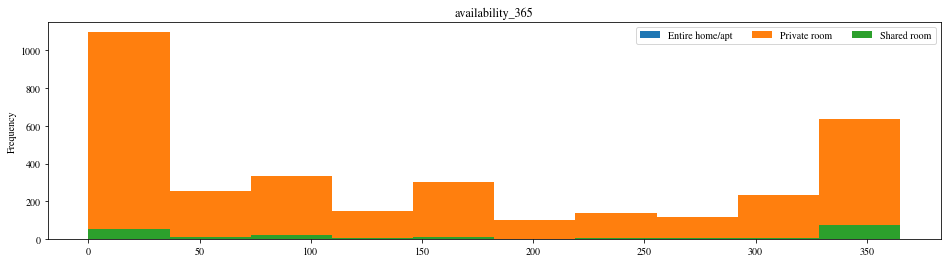

In [166]:
for cname in num_variables:
    plt.figure()
    data.groupby('room_type')[cname].plot.hist(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

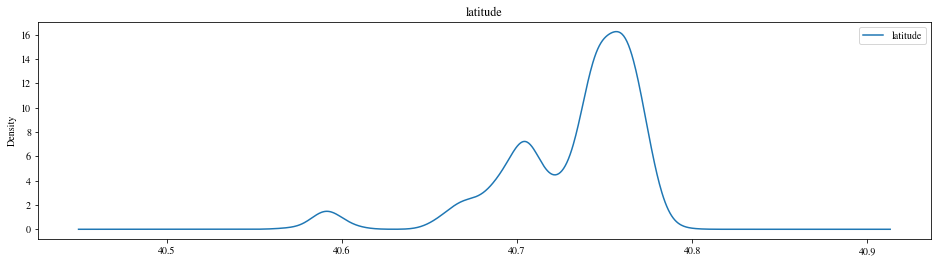

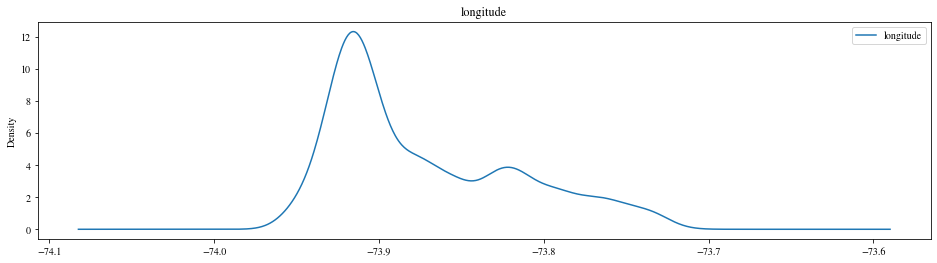

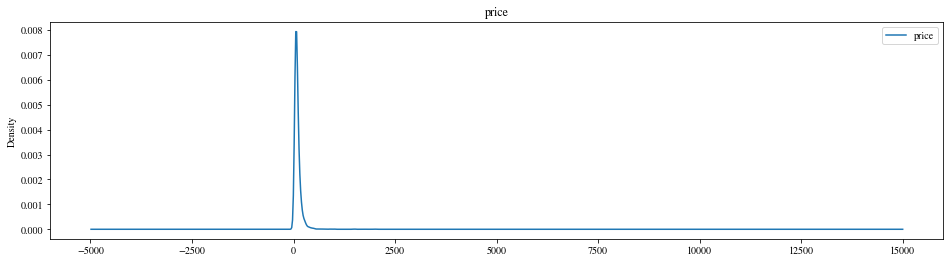

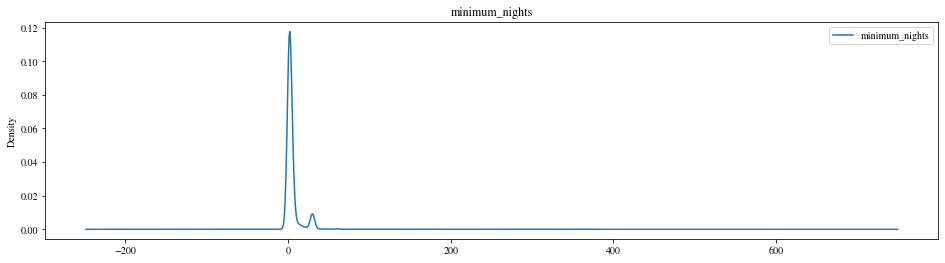

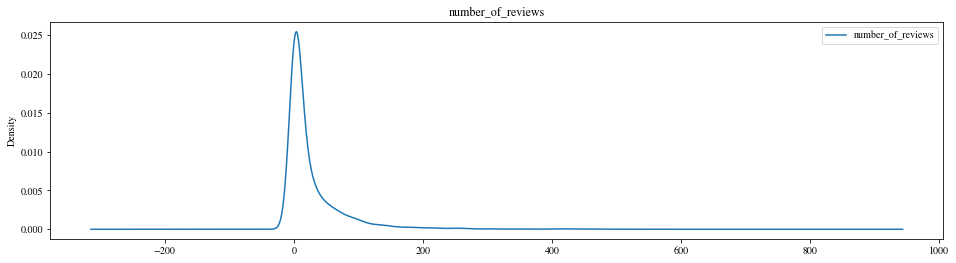

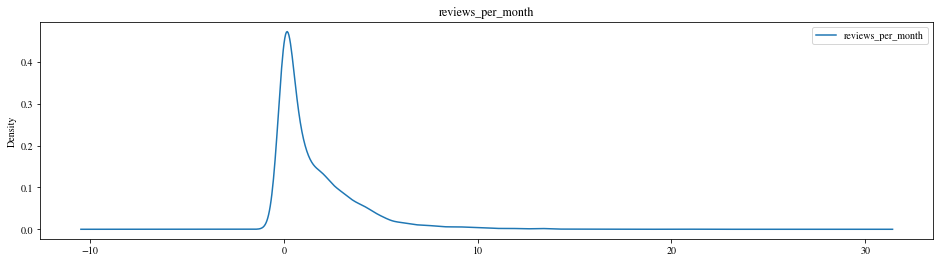

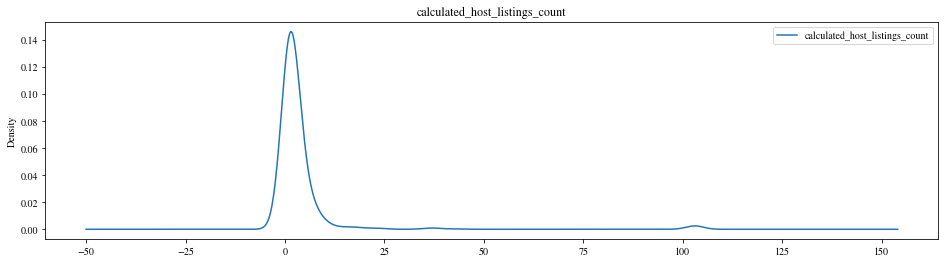

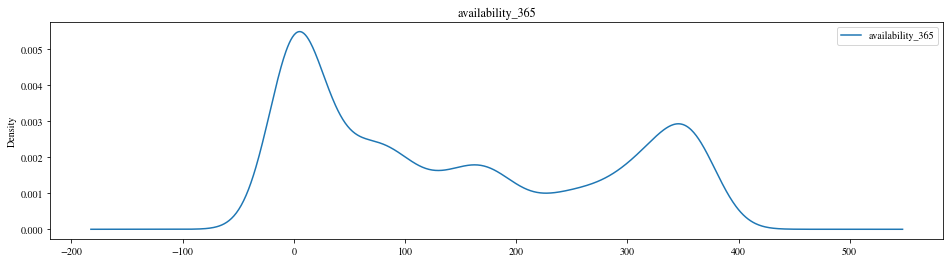

In [165]:
for cname in num_variables:
    plt.figure()
    data[cname].plot.kde(figsize=(16,4), legend=True)
    plt.title(cname)

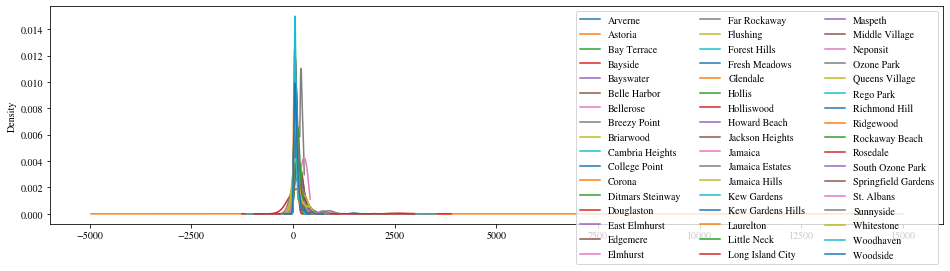

In [162]:
idx = data.price.abs() <= 1000
#df_airbnb[idx].price.plot.kde(figsize=(4,4), legend=True)

data.groupby('neighbourhood').price.plot.kde(figsize=(16,4), legend=True);
plt.legend(ncol = 3)

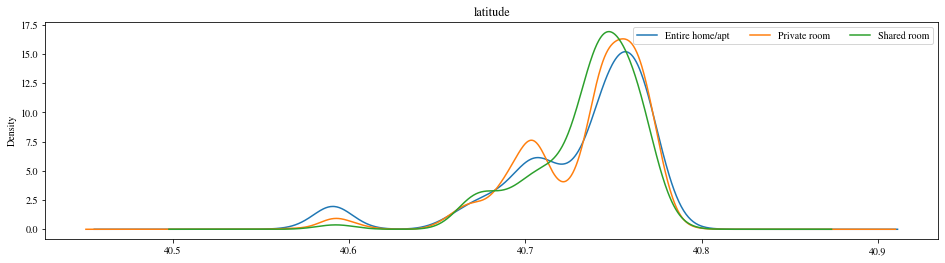

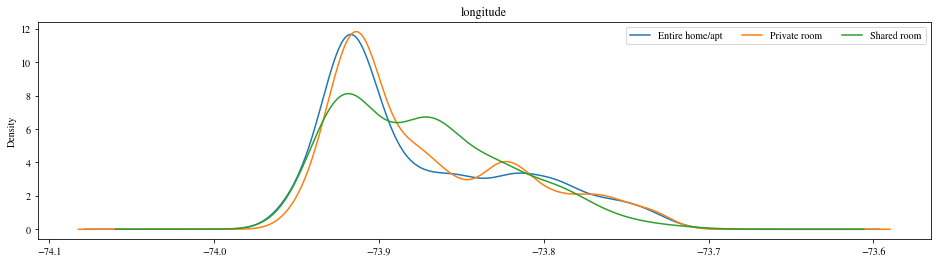

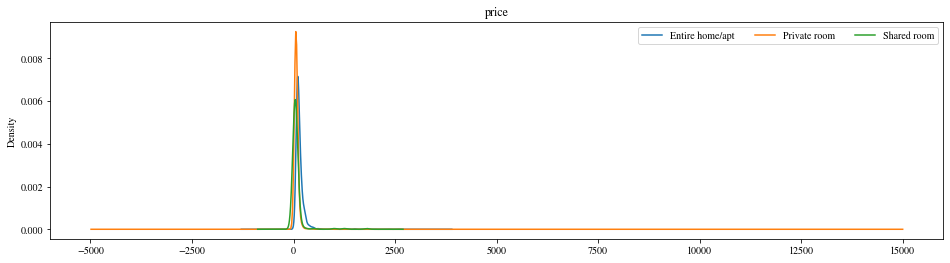

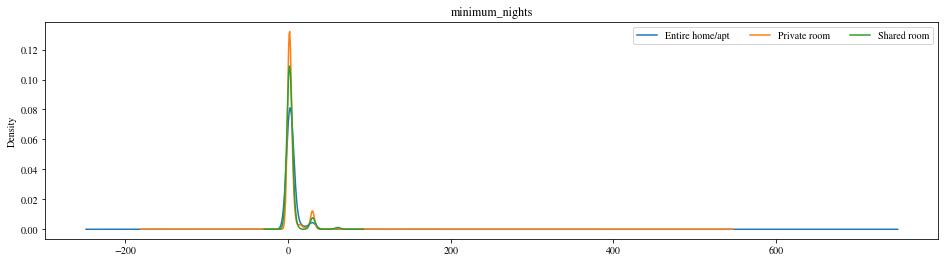

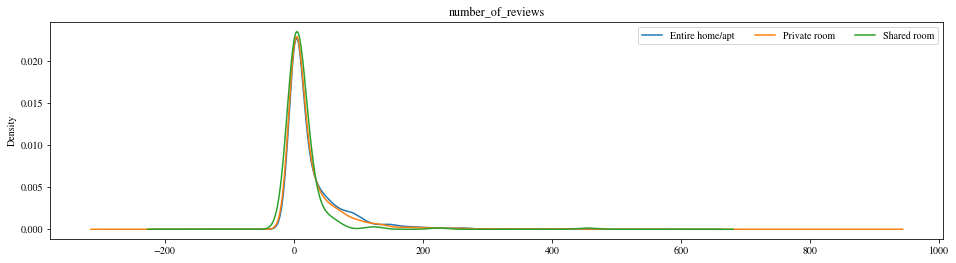

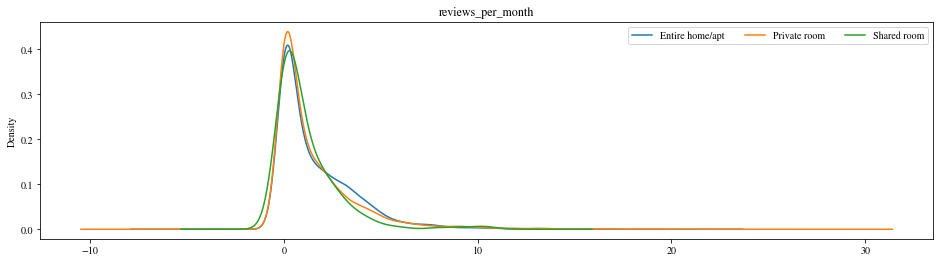

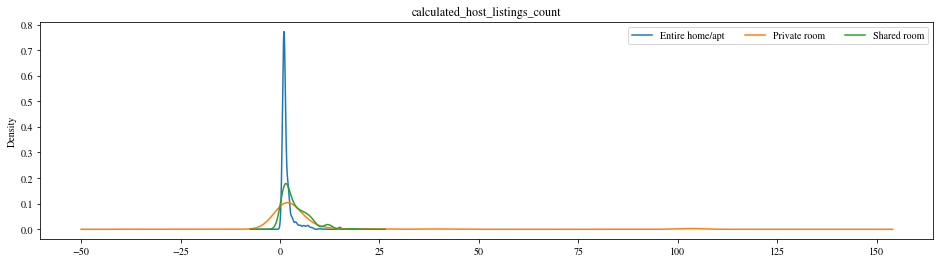

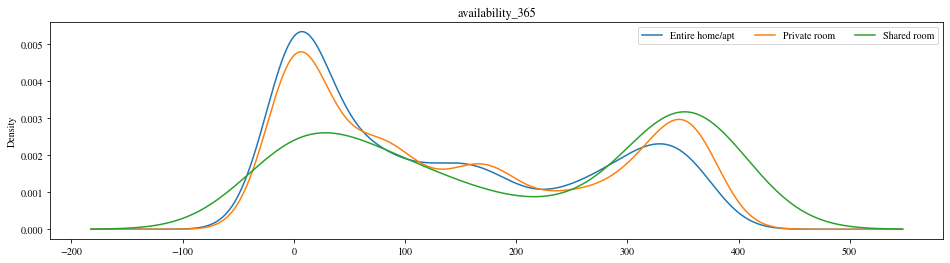

In [163]:
for cname in num_variables:
    plt.figure()
    data.groupby('room_type')[cname].plot.kde(figsize=(16,4), legend=True);
    plt.legend(ncol = 3)
    plt.title(cname)

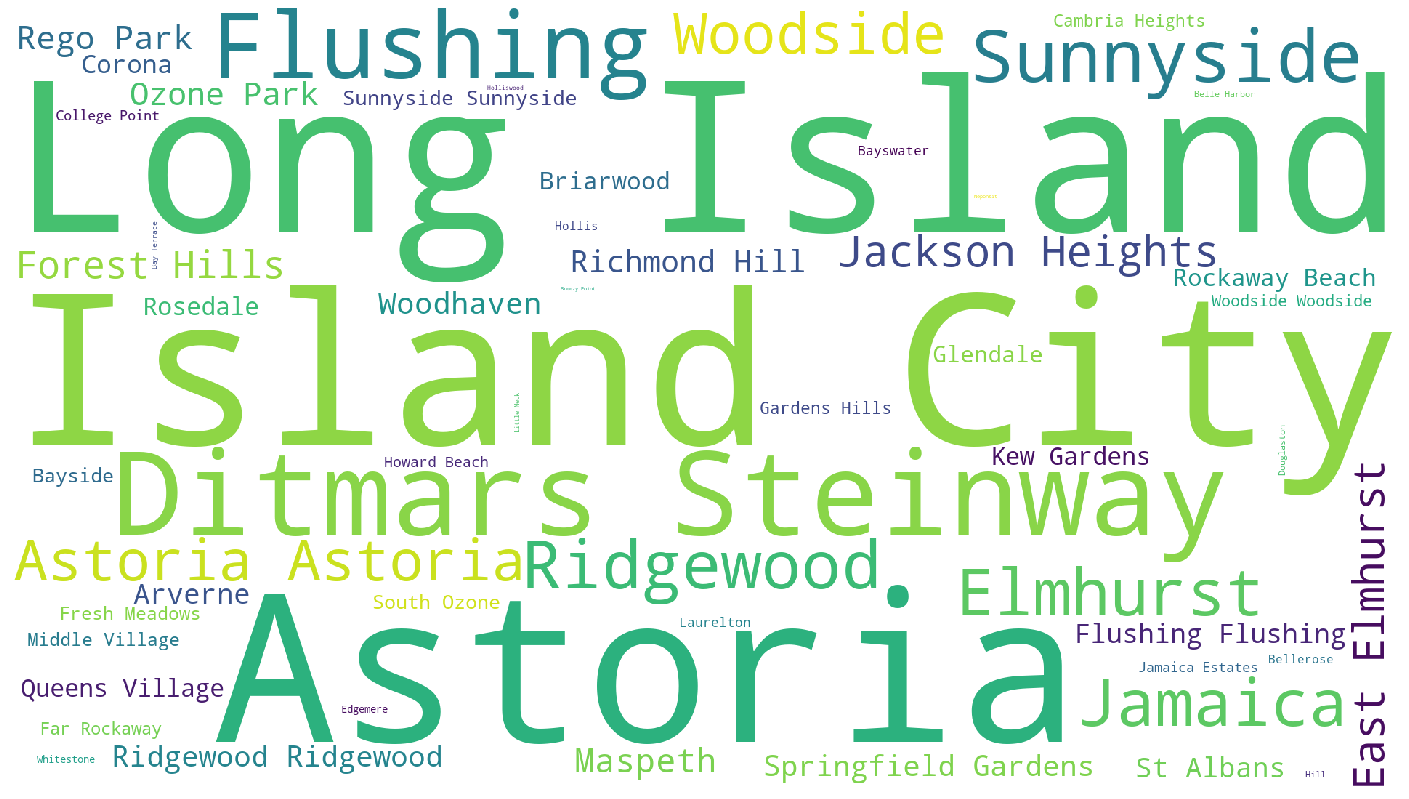

In [11]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [173]:
data.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.00e+00,0.62,-1.00e-01,1.26e-01,-7.86e-03,-0.02,-0.33,0.14,0.13,0.02
host_id,6.20e-01,1.00,-1.20e-01,2.12e-01,-2.07e-02,-0.06,-0.15,0.19,0.08,0.12
latitude,-1.00e-01,-0.12,1.00e+00,-5.73e-01,-9.64e-03,0.04,-0.01,-0.07,0.02,-0.13
longitude,1.26e-01,0.21,-5.73e-01,1.00e+00,-8.78e-03,-0.10,0.09,0.20,-0.04,0.20
price,-7.86e-03,-0.02,-9.64e-03,-8.78e-03,1.00e+00,0.15,-0.04,-0.05,-0.06,0.04
minimum_nights,-2.47e-02,-0.06,3.56e-02,-9.75e-02,1.50e-01,1.00,-0.09,-0.14,0.24,0.03
number_of_reviews,-3.33e-01,-0.15,-1.47e-02,9.01e-02,-4.11e-02,-0.09,1.00,0.63,-0.06,0.15
reviews_per_month,1.39e-01,0.19,-7.45e-02,1.98e-01,-5.00e-02,-0.14,0.63,1.00,-0.07,0.14
calculated_host_listings_count,1.26e-01,0.08,2.39e-02,-4.09e-02,-5.69e-02,0.24,-0.06,-0.07,1.00,0.09
availability_365,2.19e-02,0.12,-1.31e-01,1.97e-01,3.92e-02,0.03,0.15,0.14,0.09,1.00


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

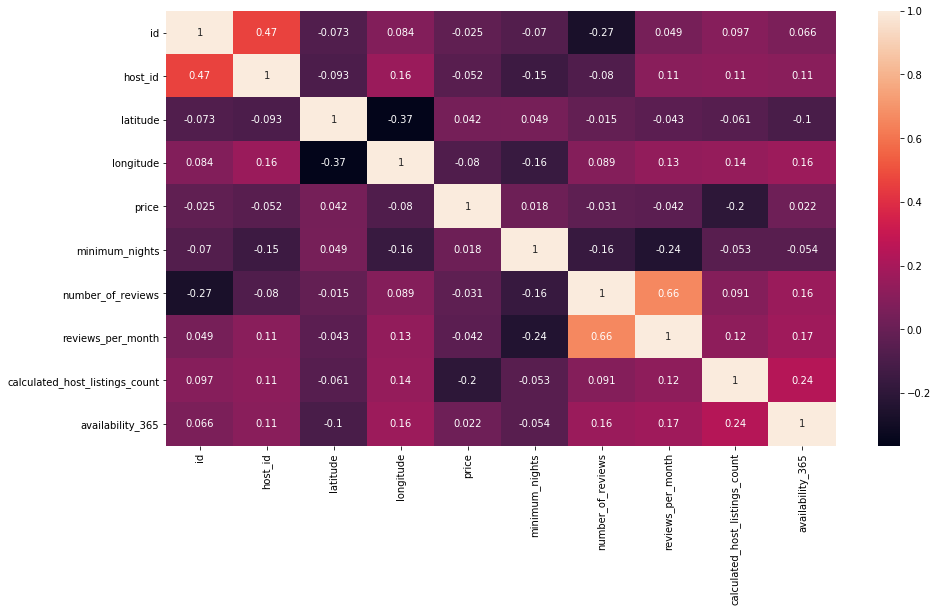

In [8]:
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

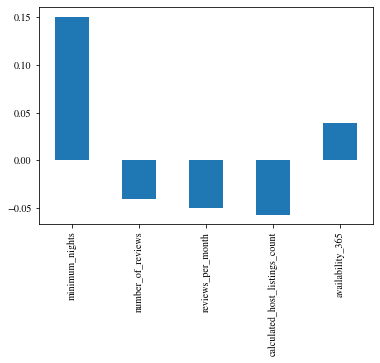

In [152]:
data.corr()['price'].drop(['price','id','host_id','latitude','longitude']).plot.bar()

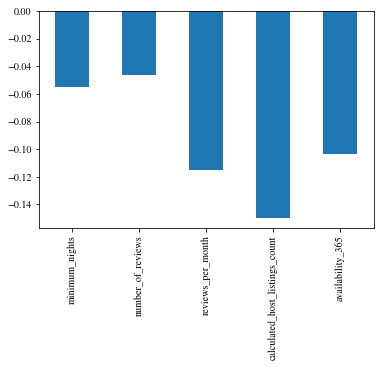

In [164]:
idx = data.room_type == 'Shared room'

data[idx].corr()['price'].drop(['price','id','host_id','latitude','longitude']).plot.bar()

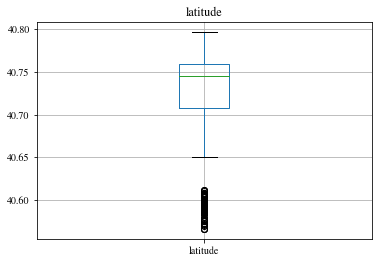

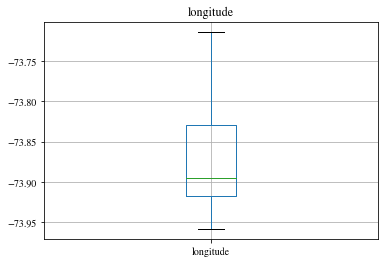

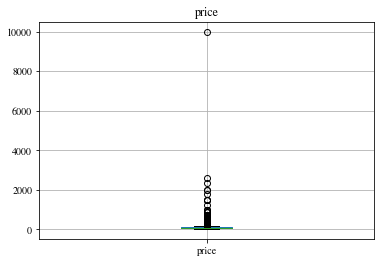

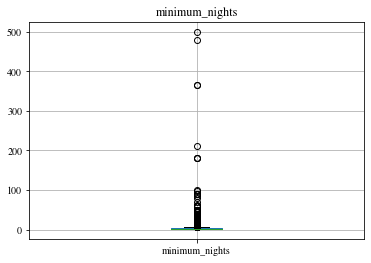

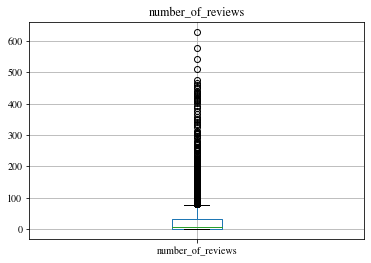

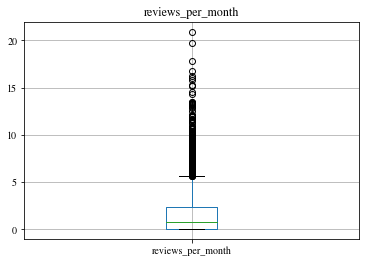

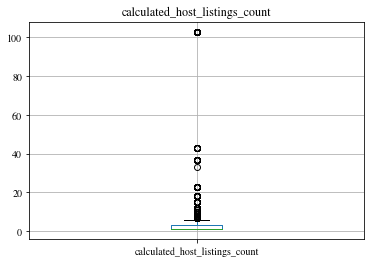

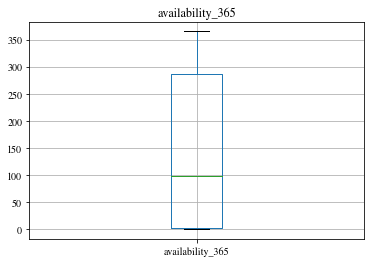

In [170]:
for cname in num_variables:
    plt.figure()
    data.boxplot(column=cname)
    plt.title(cname)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000292EEF7E408>,
      dtype=object)

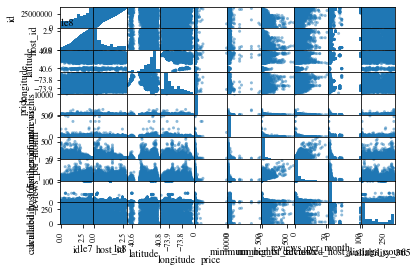

In [171]:
pandas.plotting.scatter_matrix(data)

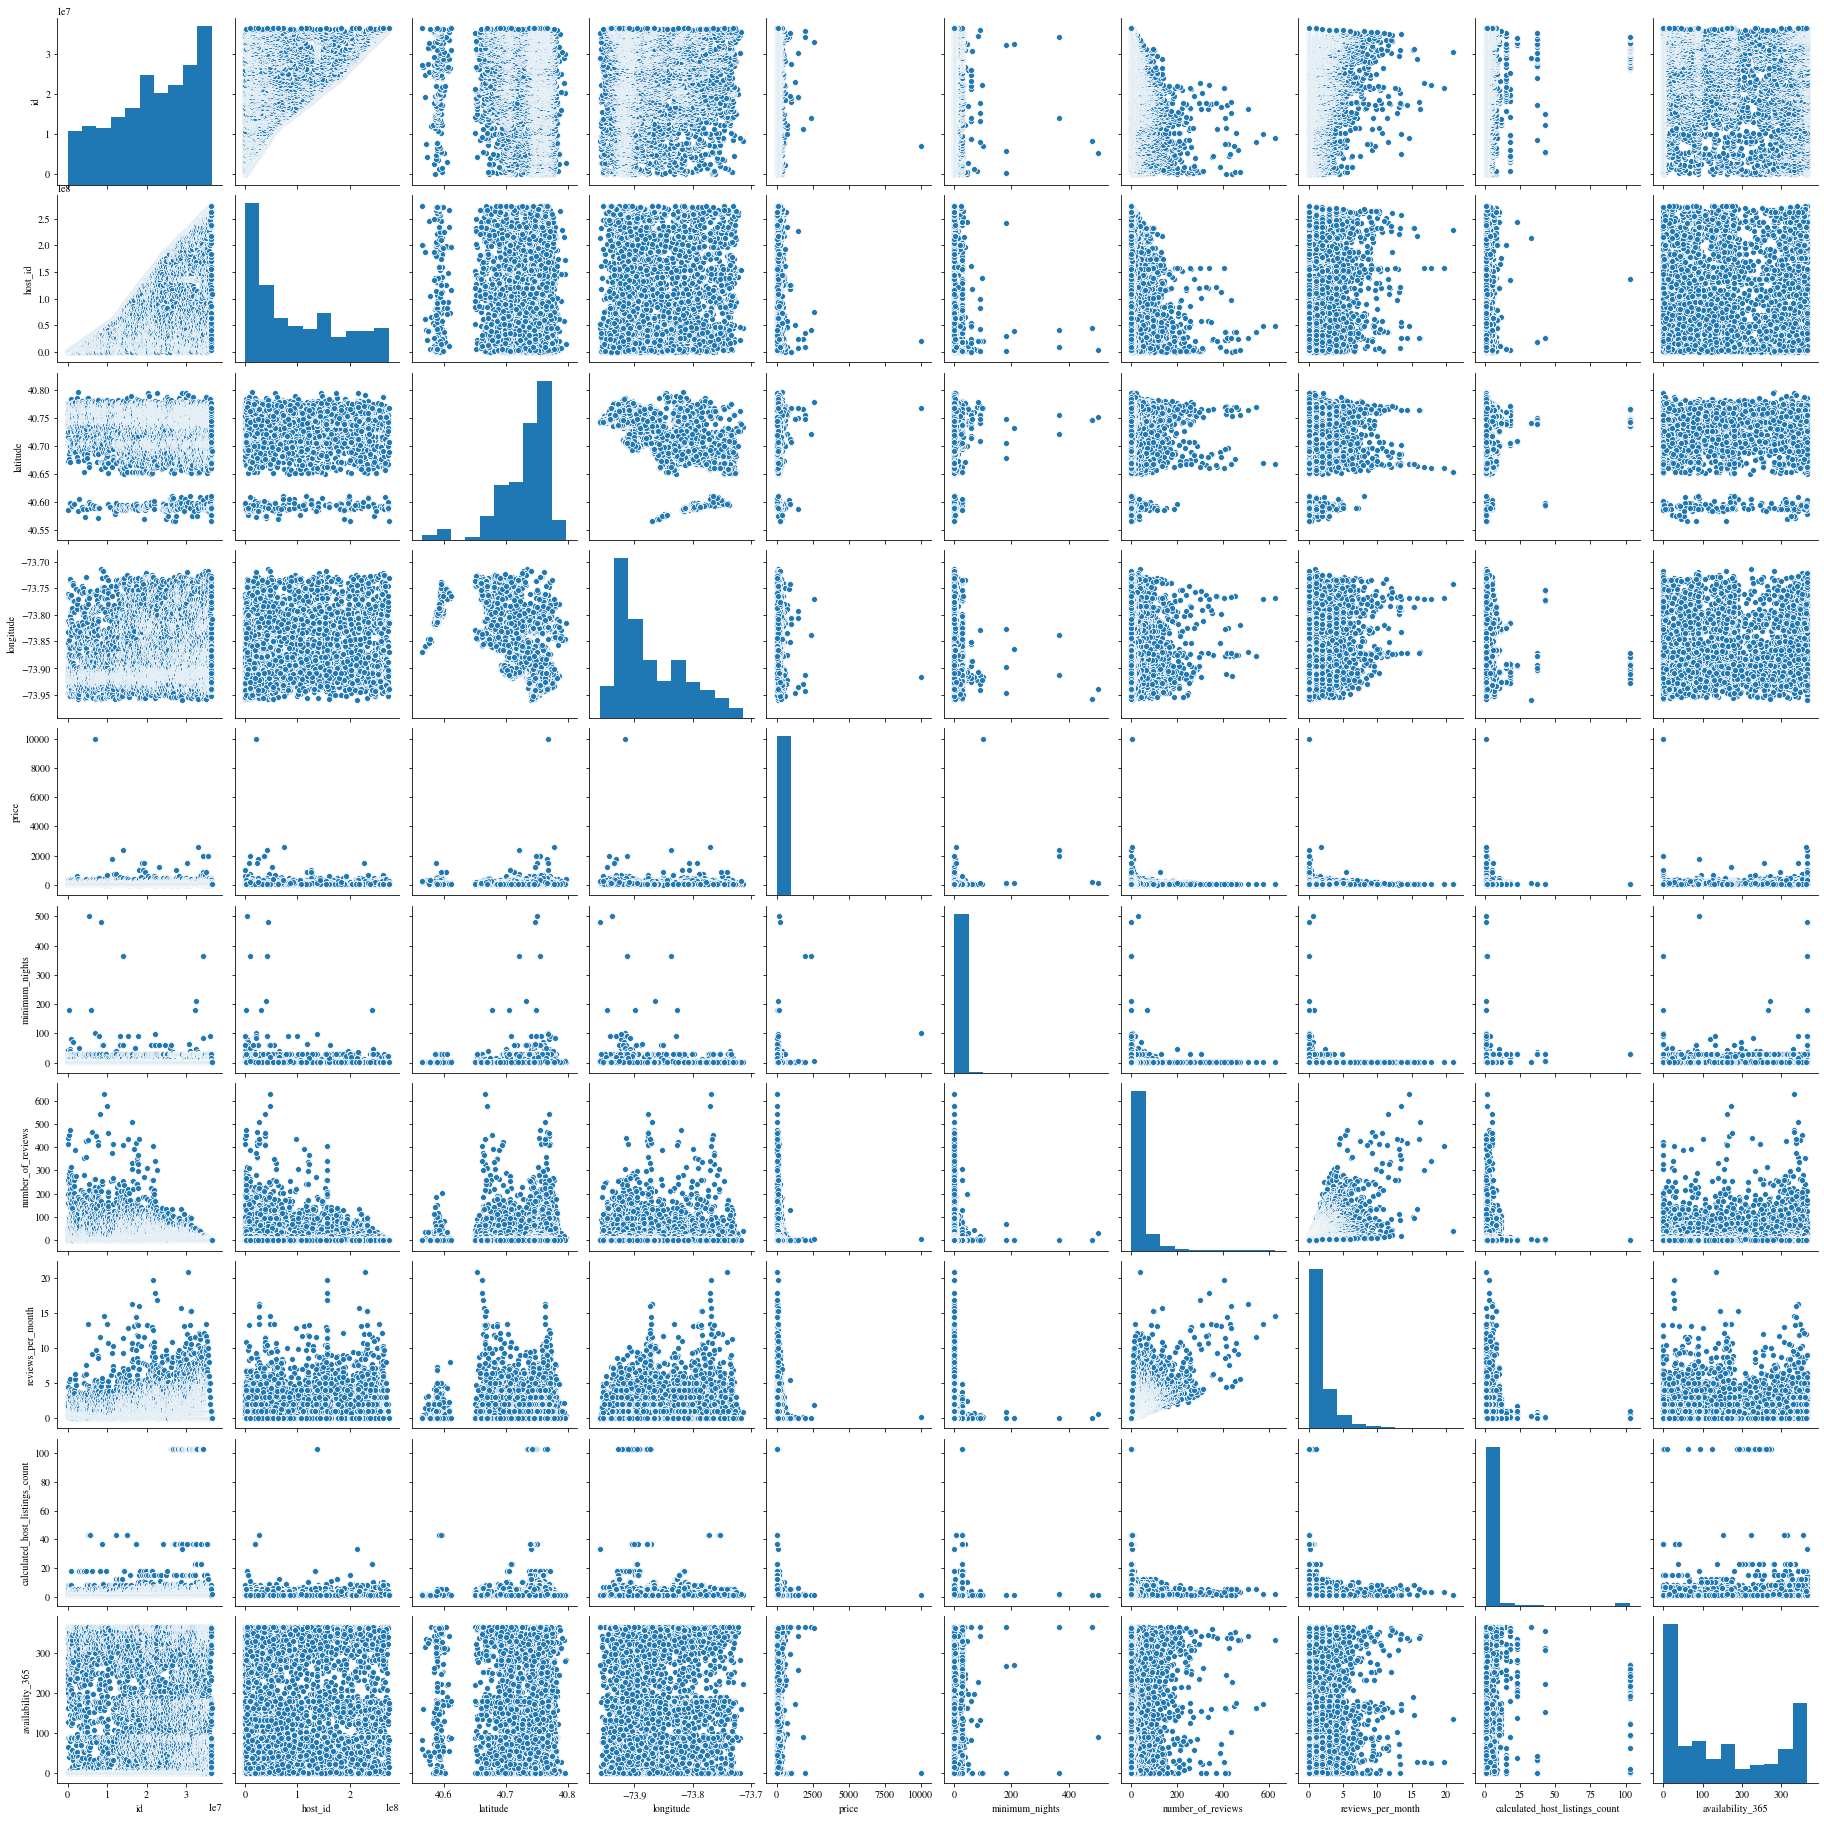

In [172]:
sns.pairplot(data)

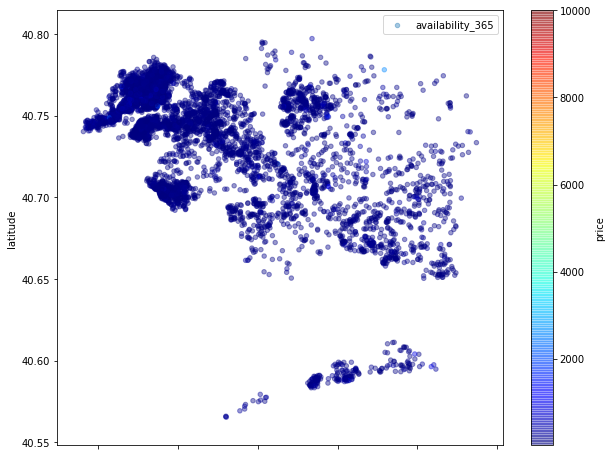

In [7]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=data.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

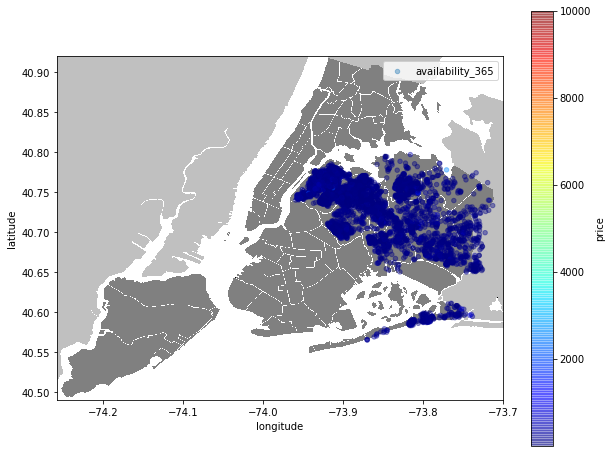

In [8]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
data.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

<BarContainer object of 10 artists>

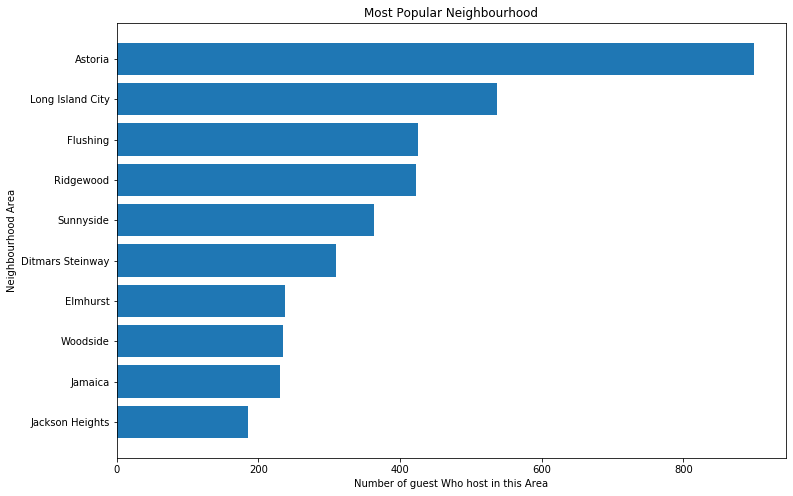

In [33]:
valuecount = data.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(valuecount.index)
y = list(valuecount.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [41]:
num_nyc_airbnb = numeric_nyc_airbnb=n=data._get_numeric_data().columns# to Extract the names of columns that are Numeric

In [36]:
print(numeric_nyc_airbnb)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [60]:
from sklearn.preprocessing import minmax_scale

In [120]:
def normalize_list_numpy(list_numpy):
    normalized_list = minmax_scale(list_numpy)
    return normalized_list

for cname in num_variables:    
    print(normalize_list_numpy(data[cname]))

[0.78640777 0.7979288  0.75434736 ... 0.61445523 0.77372168 0.54330097]
[0.04819717 0.22709924 0.51806886 ... 0.58790807 0.33295436 0.612433  ]
[0.01201201 0.00600601 0.01301301 ... 0.0048048  0.0035035  0.00550551]
[0.00400802 0.05811623 0.00200401 ... 0.         0.         0.        ]
[0.39427663 0.03974563 0.00158983 ... 0.         0.         0.        ]
[0.10744986 0.01050621 0.00047755 ... 0.         0.         0.        ]
[0.         0.         0.         ... 0.         0.03921569 0.00980392]
[0.5890411  0.88767123 0.00273973 ... 0.43561644 0.47123288 0.44657534]


In [75]:
x_num_variables = ['latitude', 'longitude', 'minimum_nights','number_of_reviews','reviews_per_month',
                 'calculated_host_listings_count','availability_365']
X = data[x_num_variables].values


In [76]:
y=data['price'].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
y,
random_state=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [79]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [80]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X)
binary_X = binarizer.transform(X)

In [85]:
dados_x = pandas.DataFrame(X)

In [87]:
dados_x.head()

,0,1,2,3,4,5,6
0,40.75,-73.95,3.0,248.0,2.25,1.0,215.0
1,40.75,-73.90,30.0,25.0,0.22,1.0,324.0
2,40.74,-73.83,2.0,1.0,0.01,1.0,1.0
3,40.75,-73.92,30.0,28.0,0.26,1.0,126.0
4,40.70,-73.90,8.0,10.0,0.11,5.0,365.0


In [102]:
scaler = per.MinMaxScaler(feature_range=(0,1))
rescaleData = scaler.fit_transform(dados_x)
rescaleData = pd.DataFrame(rescaleData,index=dados_x.index,columns=dados_x.columns)
print(rescaleData)

         0     1         2         3         4         5         6
0     0.79  0.05  4.01e-03  3.94e-01  1.07e-01  0.00e+00  5.89e-01
1     0.80  0.23  5.81e-02  3.97e-02  1.05e-02  0.00e+00  8.88e-01
2     0.75  0.52  2.00e-03  1.59e-03  4.78e-04  0.00e+00  2.74e-03
3     0.78  0.15  5.81e-02  4.45e-02  1.24e-02  0.00e+00  3.45e-01
4     0.60  0.25  1.40e-02  1.59e-02  5.25e-03  3.92e-02  1.00e+00
...    ...   ...       ...       ...       ...       ...       ...
5661  0.77  0.54  4.01e-03  0.00e+00  0.00e+00  2.94e-02  9.92e-01
5662  0.87  0.08  2.00e-03  0.00e+00  0.00e+00  9.80e-03  3.84e-02
5663  0.61  0.59  0.00e+00  0.00e+00  0.00e+00  0.00e+00  4.36e-01
5664  0.77  0.33  0.00e+00  0.00e+00  0.00e+00  3.92e-02  4.71e-01
5665  0.54  0.61  0.00e+00  0.00e+00  0.00e+00  9.80e-03  4.47e-01

[5666 rows x 7 columns]


In [109]:
scaler = StandardScaler().fit(X)
standardizedData = scaler.transform(X)
standardizedData = pd.DataFrame(standardizedData,index=dados_x.index, columns=dados_x.columns)
print(standardizedData)

         0     1     2         3     4         5     6
0     0.40 -1.31 -0.15  4.24e+00  0.32 -2.46e-01  0.52
1     0.47 -0.54  1.65 -5.20e-02 -0.63 -2.46e-01  1.32
2     0.22  0.72 -0.21 -5.14e-01 -0.73 -2.46e-01 -1.06
3     0.35 -0.88  1.65  5.77e-03 -0.61 -2.46e-01 -0.14
4    -0.69 -0.44  0.19 -3.41e-01 -0.68  7.55e-02  1.63
...    ...   ...   ...       ...   ...       ...   ...
5661  0.31  0.83 -0.15 -5.33e-01 -0.74 -4.84e-03  1.61
5662  0.89 -1.17 -0.21 -5.33e-01 -0.74 -1.66e-01 -0.96
5663 -0.59  1.02 -0.28 -5.33e-01 -0.74 -2.46e-01  0.11
5664  0.33 -0.08 -0.28 -5.33e-01 -0.74  7.55e-02  0.20
5665 -0.99  1.13 -0.28 -5.33e-01 -0.74 -1.66e-01  0.14

[5666 rows x 7 columns]


In [110]:
scaler = Normalizer().fit(X)
normalizedData = scaler.transform(X)
normalizedData = pd.DataFrame(normalizedData,index=dados_x.index, columns=dados_x.columns)
print(normalizedData)

         0     1         2     3         4         5     6
0     0.12 -0.22  8.85e-03  0.73  6.64e-03  2.95e-03  0.63
1     0.12 -0.22  8.90e-02  0.07  6.53e-04  2.97e-03  0.96
2     0.48 -0.88  2.37e-02  0.01  1.19e-04  1.19e-02  0.01
3     0.26 -0.47  1.91e-01  0.18  1.65e-03  6.36e-03  0.80
4     0.11 -0.20  2.13e-02  0.03  2.93e-04  1.33e-02  0.97
...    ...   ...       ...   ...       ...       ...   ...
5661  0.11 -0.20  8.07e-03  0.00  0.00e+00  1.08e-02  0.97
5662  0.48 -0.86  2.34e-02  0.00  0.00e+00  2.34e-02  0.16
5663  0.23 -0.41  5.56e-03  0.00  0.00e+00  5.56e-03  0.88
5664  0.21 -0.39  5.22e-03  0.00  0.00e+00  2.61e-02  0.90
5665  0.22 -0.40  5.45e-03  0.00  0.00e+00  1.09e-02  0.89

[5666 rows x 7 columns]


In [121]:
#binarization
binarizer = Binarizer(threshold=0.0).fit(X)
binData = binarizer.transform(X)
binData = pd.DataFrame(binData, index=dados_x.index,columns=dados_x.columns)
print(binData)

        0    1    2    3    4    5    6
0     1.0  0.0  1.0  1.0  1.0  1.0  1.0
1     1.0  0.0  1.0  1.0  1.0  1.0  1.0
2     1.0  0.0  1.0  1.0  1.0  1.0  1.0
3     1.0  0.0  1.0  1.0  1.0  1.0  1.0
4     1.0  0.0  1.0  1.0  1.0  1.0  1.0
...   ...  ...  ...  ...  ...  ...  ...
5661  1.0  0.0  1.0  0.0  0.0  1.0  1.0
5662  1.0  0.0  1.0  0.0  0.0  1.0  1.0
5663  1.0  0.0  1.0  0.0  0.0  1.0  1.0
5664  1.0  0.0  1.0  0.0  0.0  1.0  1.0
5665  1.0  0.0  1.0  0.0  0.0  1.0  1.0

[5666 rows x 7 columns]
